# Cluster cereals by nutritional values
### Description
Using K-means clustering (or another clustering algorithm), find clusters of cereals and explain the clusters.

### Directions
Read in the data in cereals.csv and cluster the cereals by the features you choose.

Try different amounts of clusters to see what works best, starting with 3.

Once you have your final clusters, analyze their contents. Give each cluster a name and a description explaining how the cereals in it are similar.

Write up all your analysis, complete with any graphs that may be helpful to understand it.

Note that there are a few pieces of missing data in the cereals data. You may want to fill these in using linear regression or another technique.

Two other notes:

This data is by serving size. You might consider changing it to be by weight or volume.
See this answer on Stack Overflow about normalizing data and other tips. You may want to consider normalizing your data before clustering or that answer's idea about order randomization.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

### Cleaning the data:

In [72]:
cereal = pd.read_csv("honey-nut-clusters/cereals.csv")
cereal = cereal.replace(-1, 0)
scalar = (1/cereal["weight"])
cereal["calories"] *= scalar
cereal["protein"] *= scalar
cereal["fat"] *= scalar
cereal["sodium"] *= scalar
cereal["fiber"] *= scalar
cereal["carbo"] *= scalar
cereal["potass"] *= scalar
cereal["vitamins"] *= scalar
cereal["weight"] *= scalar
cereal["cups"] *= scalar
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100%_Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33
1,100%_Natural_Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1.00
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.50
4,Almond_Delight,R,C,110,2,2,200,1,14,8,0,25,3,1,0.75


In [55]:
companies = cereal.mfr.unique()
for x in companies:
    places = list(companies).index(x)
    print(places)
    mfr = []
    for y in cereal.mfr:
        mfr.append(list(companies).index(y))

cereal["mfr"] = mfr
cereal.index = cereal["name"]
cereal.dropna(inplace=True)
cereal2 = cereal[["mfr", "calories", "protein", "fat", "sodium", "fiber", "carbo", "sugars"]]
cereal2.head()

0
1
2
3
4
5
6


,mfr,calories,protein,fat,sodium,fiber,carbo,sugars
name,,,,,,,,
100%_Bran,0,70,4,1,130,10,5,6
100%_Natural_Bran,1,120,3,5,15,2,8,8
All-Bran,2,70,4,1,260,9,7,5
All-Bran_with_Extra_Fiber,2,50,4,0,140,14,8,0
Almond_Delight,3,110,2,2,200,1,14,8


### Reducing data to 2 dimensions:

In [57]:
pca = PCA(n_components=2)
pca.fit(cereal2)
reduced_cereal = pca.transform(cereal2)
reduced_cereal

array([[ -24.27645962,   34.52807371],
       [-138.02221504,  -18.91581337],
       [ 105.7138916 ,   37.47229513],
       [ -14.71758463,   55.38082726],
       [  46.76719406,   -5.05397126],
       [  26.7436322 ,   -5.50480016],
       [ -28.23549658,   -7.22091032],
       [   4.39485559,    6.10591059],
       [  46.3065687 ,   15.17441215],
       [  56.28627529,   15.75733415],
       [  66.96779663,  -14.83258934],
       [ 136.75185407,   -2.18798451],
       [  56.9943938 ,  -14.89489848],
       [ -13.22440777,   -6.21263155],
       [  26.77182918,   -6.05447841],
       [ 126.82157161,   -3.11658971],
       [ 136.568144  ,    7.266714  ],
       [ -63.20315747,   -7.97092648],
       [  26.77182918,   -6.05447841],
       [ -13.2755612 ,   -5.82084038],
       [ -73.37588656,    2.52543682],
       [  66.82200912,   -4.36149103],
       [ -13.46748088,    3.45739561],
       [  36.58072197,    4.72041333],
       [ -28.23713892,   -7.14878432],
       [  46.76820287,   

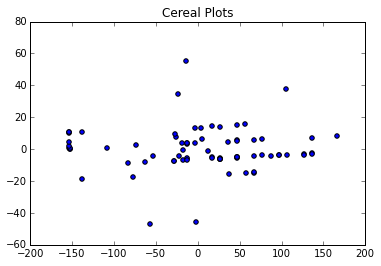

In [60]:
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1])
plt.title("Cereal Plots")
plt.show()

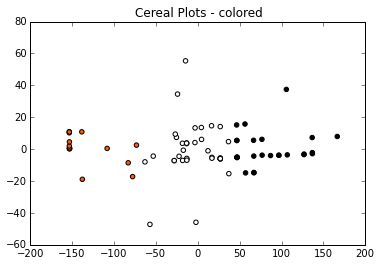

In [64]:
kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_cereal)
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal Plots - colored")
plt.show()

AttributeError: Unknown property fig_size

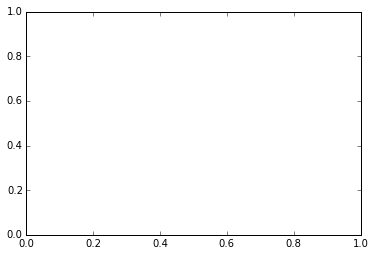

In [71]:
kmeans = KMeans(4)
y_pred = kmeans.fit_predict(reduced_cereal)
plt.scatter(reduced_cereal[:, 0], reduced_cereal[:, 1], c=y_pred, cmap="hot")
plt.title("Cereal Plots - colored")
plt.show()

In [67]:
help(cmap)

NameError: name 'cmap' is not defined